In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, GlobalAveragePooling2D, Dropout
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import random
from tensorflow.keras.applications.inception_v3 import InceptionV3
import matplotlib.pyplot as plt

In [2]:
TRAIN_PATH = "D:/flowers_recognition/Dataset/splits/train"
VAL_PATH = "D:/flowers_recognition/Dataset/splits/val"
TEST_PATH = "D:/flowers_recognition/Dataset/splits/test"

In [3]:
IMAGE_SIZE = 250
CHANNELS = 3
BATCH_SIZE = 256
EPOCHS = 20

In [4]:
train = ImageDataGenerator(rescale = 1./255,
                           rotation_range = 25,
                           shear_range = 0.5,
                           zoom_range = 0.5,
                           width_shift_range = 0.2,
                           height_shift_range=0.2,
                           horizontal_flip=True
                          )

validation = ImageDataGenerator(rescale = 1./255,
                           rotation_range = 25,
                           shear_range = 0.5,
                           zoom_range = 0.5,
                           width_shift_range = 0.2,
                           height_shift_range=0.2,
                           horizontal_flip=True
                          )

In [5]:
train_batches = train.flow_from_directory(TRAIN_PATH, 
                                       target_size=(IMAGE_SIZE,IMAGE_SIZE), 
                                       batch_size=BATCH_SIZE, 
                                       class_mode="categorical",
                                       seed=42)

Found 3019 images belonging to 5 classes.


In [6]:
val_batches = validation.flow_from_directory(VAL_PATH, 
                                       target_size=(IMAGE_SIZE,IMAGE_SIZE), 
                                       batch_size=BATCH_SIZE, 
                                       class_mode="categorical",
                                       seed=42)

Found 860 images belonging to 5 classes.


In [7]:
train_batches.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [8]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

In [9]:
inception = InceptionV3(weights="imagenet",
                        include_top=False,
                        input_shape=IMG_SHAPE)

In [10]:
inception.trainable = False

In [11]:
model = Sequential([
    inception,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(1024, activation='relu'),
    Dense(5, activation='softmax')
])

In [12]:
model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
num_training = 3019

In [14]:
tf.random.set_seed(1)
np.random.seed(1)
random.seed(1)

In [15]:
history = model.fit(train_batches,
                    steps_per_epoch = num_training//BATCH_SIZE,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    validation_data = val_batches
                   )

Epoch 1/20
11/11 [==============================] - 76s 6s/step - loss: 3.5942 - accuracy: 0.3677 - val_loss: 1.5289 - val_accuracy: 0.4651
Epoch 2/20
11/11 [==============================] - 41s 4s/step - loss: 1.0100 - accuracy: 0.6649 - val_loss: 0.7962 - val_accuracy: 0.7058
Epoch 3/20
11/11 [==============================] - 41s 4s/step - loss: 0.7055 - accuracy: 0.7394 - val_loss: 0.6134 - val_accuracy: 0.7895
Epoch 4/20
11/11 [==============================] - 41s 4s/step - loss: 0.5747 - accuracy: 0.7839 - val_loss: 0.5582 - val_accuracy: 0.8093
Epoch 5/20
11/11 [==============================] - 42s 4s/step - loss: 0.5184 - accuracy: 0.8183 - val_loss: 0.4998 - val_accuracy: 0.8233
Epoch 6/20
11/11 [==============================] - 41s 4s/step - loss: 0.4784 - accuracy: 0.8281 - val_loss: 0.4838 - val_accuracy: 0.8244
Epoch 7/20
11/11 [==============================] - 42s 4s/step - loss: 0.4640 - accuracy: 0.8306 - val_loss: 0.4624 - val_accuracy: 0.8384
Epoch 8/20
11/11 [==

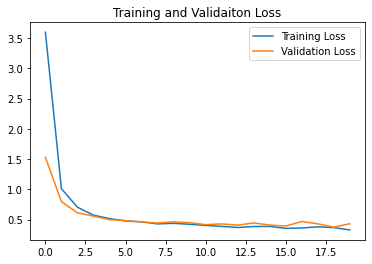

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend()
plt.title("Training and Validaiton Loss")
plt.show()

In [17]:
testing = ImageDataGenerator(rescale = 1./255)
test_batches = testing.flow_from_directory(TEST_PATH, 
                                       target_size=(IMAGE_SIZE,IMAGE_SIZE), 
                                       batch_size=BATCH_SIZE, 
                                       class_mode="categorical",
                                       seed=42)

Found 438 images belonging to 5 classes.


In [18]:
results = model.evaluate(test_batches)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

2/2 [==============================] - 6s 5s/step - loss: 0.3177 - accuracy: 0.8813
Test loss: 0.31772616505622864
Test accuracy: 0.8812785148620605
